# Importing necessary libraries

In [9]:
import os
import numpy as np
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.results_plotter import ts2xy, load_results
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv, VecMonitor,VecFrameStack
from stable_baselines3.common.utils import set_random_seed
from stable_baselines3.common.monitor import Monitor
from gym.wrappers import ResizeObservation, GrayScaleObservation
from stable_baselines3.common.atari_wrappers import MaxAndSkipEnv
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
import retro
import time
from matplotlib import pyplot as plt

# Setting the environment (same way model trained on)

In [10]:
def make_env(env_id):
    def _init():
        env = gym_super_mario_bros.make(env_id)
        env = JoypadSpace(env, SIMPLE_MOVEMENT)
        env = ResizeObservation(env, shape=(84, 84))
        env = GrayScaleObservation(env, keep_dim=True)
        env = MaxAndSkipEnv(env, 4)
        return env

    return _init


In [11]:
#env_id = 'SuperMarioBros-1-2-v0'
#env_id = 'SuperMarioBros-1-1-v0'
env_id = 'SuperMarioBros-v0'


# 4 environments (the way that the ai is trained)

In [12]:
if __name__ == '__main__':
    # Part 7: Set environment and training parameters
    
    environment_count = 4
    
    # Part 8: Create the vectorized environment
    env = VecFrameStack(SubprocVecEnv([make_env(env_id) for i in range(environment_count)]), n_stack=4, channels_order='last')


# Or Normal (1 environment)

In [13]:
env = make_env(env_id)  # Create the environment
env = VecFrameStack(DummyVecEnv([make_env(env_id)]), n_stack=4, channels_order='last')

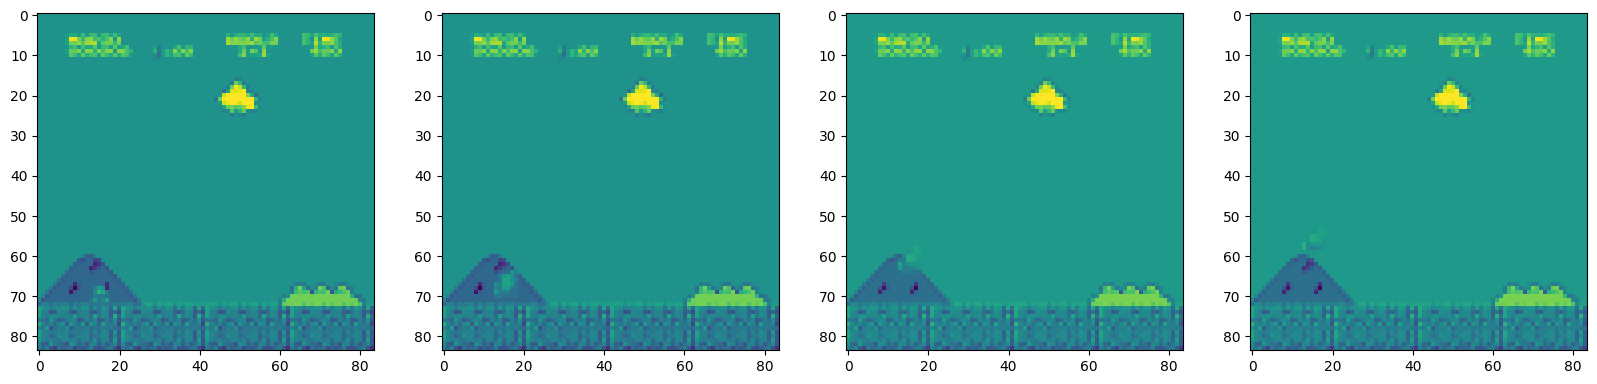

In [14]:
state = env.reset()
env.step([5])
env.step([5])
state, reward, done, info =env.step([5])
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

# Loading the m

In [15]:
#model = PPO.load('./logs08/ssv3')
#model = PPO.load('./logs08/480000')
#model = PPO.load('./logs42_41/1072000_v1')
#model = PPO.load('./logs42_41/25000')
model = PPO.load('./logs38_39_41/2000000_v2')

# Running it 

In [ ]:
state = env.reset()


while True:
    
    action, _ = model.predict(state)

    state, reward, done, info = env.step(action)
    
     
    env.render()
    time.sleep(1 / 60)


